## 게임 회사의 데이터 팀 - **다음 분기에 어떤 게임을 설계해야 할까**
  **비데이터 직군에게 발표를 한다고 가정 !**

Name : 게임의 이름입니다.  
Platform : 게임이 지원되는 플랫폼의 이름입니다.  
Year : 게임이 출시된 연도입니다.  
Genre : 게임의 장르입니다.  
Publisher : 게임을 배급한 회사입니다.  
NA_Sales : 북미지역에서의 출고량입니다.  
EU_Sales : 유럽지역에서의 출고량입니다.  
JP_Sales : 일본지역에서의 출고량입니다.  
Other_Sales : 기타지역에서의 출고량입니다.  

### 필수 조건
다음 필수 조건은 전부 만족해야 2점을 받을 수 있습니다.

- 영상 길이 조건을 만족했는가?  
  - 영상이 5분 ~ 10분 사이로 제작됨

- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?  
  - 지역은 어떻게 구분했는지 설명함  
  - 지역별로 선호하는 게임의 장르를 파악함  
  - 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함  

- 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?  
  - 트렌드는 어떤 것을 기준으로 파악했는지 설명함  
  - 연도별로 트렌드가 존재하는지 여부를 언급함  
  - 왜 존재한다/존재하지 않는다고 생각했는지 설명함  

- 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되었는가?  
  - 인기가 많다는 것을 어떻게 정의했는지 설명함  
  - 해당 게임이 왜 인기가 많다고 생각했는지 설명함  
  - 시각화를 통해 무엇을 나타내고자 하는지를 고려하여 파라미터를 조정함 (제목, 축이름 필수, 그 외 파라미터는 선택사항)  
  - 해당 분석을 통해 어떤 인사이트를 도출할 수 있는지 설명함  

- 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되었는가?  
   - 분석에 대한 결론이 영상에서 제시됨  

### 추가 조건 (Advanced Goal)  
다음 추가 조건은 1개 이상 만족 시 3점을 받을 수 있습니다.  

- 디테일한 시점 및 목표 설정이 문제 정의 과정에서 제시되었는가?  
- 도메인 지식을 활용하여 비지니스 인사이트를 도출하였는가?  
- 제공된 데이터셋 외에 추가 데이터를 사용하였는가?  
- 통계적 기법을 활용한 가설 검정을 진행하였는가?  
- 완성도 높은 시각화를 보여주었는가?  
- 가독성, 목적성이 잘 드러나는 시각화  
  
더불어 유의미한 인사이트를 도출하기 위해서는  

- 다음 분기가 언제인지
- 회사의 규모는 어느정도인지  
와 같은 디테일한 상황 설정과 더불어 '왜' 이러한 결론을 도출하였는지에 대한 고민이 필요합니다.
위의 4가지 내용에 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

--------------------------

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
df = pd.read_csv("/content/vgames2.csv")

In [5]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


## 전처리 & EDA

In [7]:
# Unnamed: 0 컬럼 제거
# Year, Genre, Publisher 결측치 제거 / 처리
# Year 컬럼 - int로 변환
# NA_Sales ~ Other_Sales 컬럼 - 이상한 관측치 처리하고 float로 변환

In [8]:
# 데이터 복사해서 사용 (원본 데이터 보호)
df_c = df

In [9]:
df_c.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [10]:
df_c.isnull().sum() / df_c.shape[0]

## Year은 전체에서 1%, Genre과 Publisher은 전체에서 0.3%의 결측치가 존재하며 이는 전체 데이터에서 아주 작은 비율이므로
## 세 컬럼에 존재하는 결측치가 있는 행을 모두 삭제하기로 함

Unnamed: 0     0.000000
Name           0.000000
Platform       0.000000
Year           0.016327
Genre          0.003012
Publisher      0.003494
NA_Sales       0.000000
EU_Sales       0.000000
JP_Sales       0.000000
Other_Sales    0.000000
dtype: float64

In [11]:
# 불필요한 Unnamed: 0 컬럼 제거
df_c.drop(columns = 'Unnamed: 0', inplace = True)

In [12]:
# 결측치 있는 레이블 제거
df_c = df_c.dropna().reset_index(drop = True)
df_c.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16240,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


In [13]:
# Year 컬럼 integer로 변환
df_c.Year = df_c.Year.astype('int')
df_c.Year

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16236    2006
16237    2005
16238    2015
16239    2013
16240    1996
Name: Year, Length: 16241, dtype: int64

In [14]:
df_c.Year.describe()

# 최소값이 0?

count    16241.000000
mean      1994.178437
std        155.484265
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd621ad55b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd621ad5c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd621ad5250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd621a65370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd621a65670>],
 'means': []}

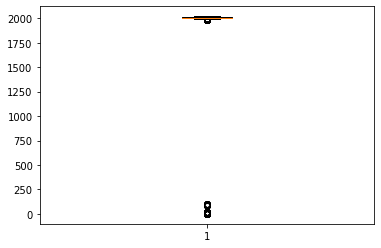

In [15]:
plt.boxplot(df_c.Year)

In [16]:
# 세계 최초의 영화가 1895년작 인 것을 감안하여 Year 변수가 1895보다 작은 값들 확인
df_c.Year[df_c.Year < 1895]

72        9
79       97
210      11
299      15
758       3
         ..
15641    94
15756     8
15801     8
16042     0
16127    98
Name: Year, Length: 100, dtype: int64

In [17]:
len(df_c.Year[df_c.Year < 1000]) / df_c.shape[0]

0.006157256326580876

In [18]:
# 1895보다 작은 값들은 어떤 값이 잘못 입력된 것인지 알 수 없고 현재까지 전처리한 데이터 크기의 6%이기 때문에 제거하기로 결정
idx_1895 = df_c[df_c.Year < 1895].index
df_c = df_c.drop(index = idx_1895).reset_index(drop = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6215aa3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6215aaa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6215aa070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6215b6190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6215b6490>],
 'means': []}

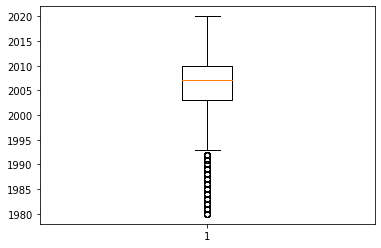

In [19]:
plt.boxplot(df_c.Year)

In [20]:
df_c.Year.describe()

count    16141.000000
mean      2006.406356
std          5.830780
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [21]:
# df.NA_Sales = df.NA_Sales.astype(np.float)
# ValueError: could not convert string to float: '480K' 오류 발생

In [22]:
df_c.NA_Sales[df_c.NA_Sales.str.contains('M') | df_c.NA_Sales.str.contains('K')]

10        480K
44         60K
140         0K
435      0.58M
446      0.25M
         ...  
15748     120K
15880     720K
15957    0.53M
16037     470K
16122     320K
Name: NA_Sales, Length: 188, dtype: object

In [23]:
idx_NA = df_c[df_c.NA_Sales.str.contains('K')].index
idx_EU = df_c[df_c.EU_Sales.str.contains('K')].index
idx_JP = df_c[df_c.JP_Sales.str.contains('K')].index
idx_Other = df_c[df_c.Other_Sales.str.contains('K')].index

출고량 데이터 중 
K는 1,000(천)을 의미,   
M는 1,000,000(백만)을 의미하므로  
출고량의 단위가 백만 단위임을 짐작할 수 있다.  
→ K와 M를 제거하고 10 이상인 데이터 1,000으로 나눠서 백만 단위 맞춰주기

In [24]:
df_c.NA_Sales = df_c.NA_Sales.str.replace('K', '')
df_c.NA_Sales = df_c.NA_Sales.str.replace('M', '')

In [25]:
df_c.NA_Sales[df_c.NA_Sales.str.contains('M') | df_c.NA_Sales.str.contains('K')]

Series([], Name: NA_Sales, dtype: object)

In [26]:
df_c.EU_Sales = df_c.EU_Sales.str.replace('K', '')
df_c.EU_Sales = df_c.EU_Sales.str.replace('M', '')
df_c.JP_Sales = df_c.JP_Sales.str.replace('K', '')
df_c.JP_Sales = df_c.JP_Sales.str.replace('M', '')
df_c.Other_Sales = df_c.Other_Sales.str.replace('K', '')
df_c.Other_Sales = df_c.Other_Sales.str.replace('M', '')

In [27]:
df_c.NA_Sales = df_c.NA_Sales.astype(float)
df_c.EU_Sales = df_c.EU_Sales.astype(float)
df_c.JP_Sales = df_c.JP_Sales.astype(float)
df_c.Other_Sales = df_c.Other_Sales.astype(float)

In [28]:
df_c.NA_Sales[idx_NA] = df_c.NA_Sales[idx_NA] / 1000

<ipython-input-28-ea1dff1809f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.NA_Sales[idx_NA] = df_c.NA_Sales[idx_NA] / 1000


In [29]:
df_c.NA_Sales[10]

0.48

In [30]:
df_c.EU_Sales[idx_EU] = df_c.EU_Sales[idx_EU] / 1000
df_c.JP_Sales[idx_JP] = df_c.JP_Sales[idx_JP] / 1000
df_c.Other_Sales[idx_Other] = df_c.Other_Sales[idx_Other] / 1000

<ipython-input-30-b59db22c426b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.EU_Sales[idx_EU] = df_c.EU_Sales[idx_EU] / 1000
<ipython-input-30-b59db22c426b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.JP_Sales[idx_JP] = df_c.JP_Sales[idx_JP] / 1000
<ipython-input-30-b59db22c426b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.Other_Sales[idx_Other] = df_c.Other_Sales[idx_Other] / 1000


In [31]:
# 총 출고량 컬럼
df_c['Total_Sales'] = df_c.NA_Sales + df_c.EU_Sales + df_c.JP_Sales + df_c.Other_Sales

In [32]:
# 현재까지 총 출고량
sum(df_c.NA_Sales) + sum(df_c.EU_Sales) + sum(df_c.JP_Sales) + sum(df_c.Other_Sales)

8694.349999999973

In [33]:
data = [sum(df_c.NA_Sales), sum(df_c.EU_Sales), sum(df_c.JP_Sales), sum(df_c.Other_Sales)]
data

[4279.88000000011, 2377.869999999982, 1258.2099999999461, 778.3899999999338]

In [34]:
sales = pd.DataFrame(data, index = ['NA', 'EU', 'JP', 'Other'], columns = ['Sales'])
sales

,Sales
NA,4279.88
EU,2377.87
JP,1258.21
Other,778.39


Text(0.5, 1.0, 'Sales by region')

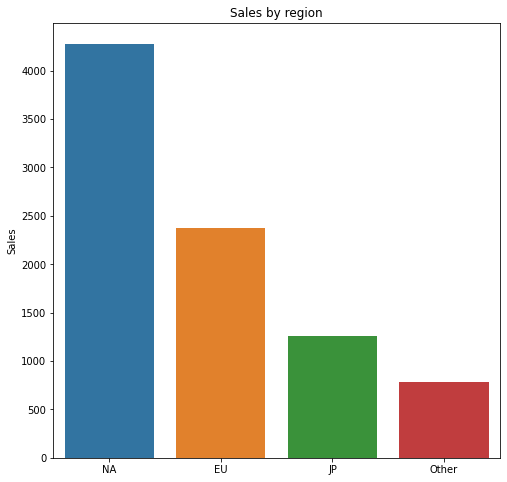

In [35]:
plt.figure(figsize=(8, 8))

sns.barplot(x = sales.index, y = sales.Sales).set_title("Sales by region")

In [36]:
df_c.duplicated().sum()

0

In [37]:
df_c.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [38]:
df_c.shape

(16141, 10)

In [39]:
df_c.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16141.000000,16141.000000,16141.000000,16141.000000,16141.000000,16141.000000
mean,2006.406356,0.265156,0.147319,0.077951,0.048224,0.538650
std,5.830780,0.822621,0.508480,0.306771,0.189939,1.562156
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [40]:
len(df_c.Platform.value_counts())

31

In [41]:
len(df_c.Publisher.value_counts())

573

In [42]:
len(df_c.Genre.value_counts())

12

## 상황설정  
- 출시 목표 분기 : 2023년 2분기
- 1980년부터 2020년까지 40년동안 총 출고량 86억 9435만건에 이르는 대규모 게임 제작사
- 당사의 게임은 총 31개의 Platform에서 지원됨
- 당사의 게임은 총 573개의 Publisher에 배급되었음
- 당사의 게임은 총 12개의 Genre로 제작되었음
- 당사의 게임은 주로 북미, 유럽, 일본 지역에 출고되며, 이에 비해 적은 양이지만 타지역에도 출고됨

## 데이터 분석
### 지역에 따라서 선호하는 게임 장르가 다를까 ?
- 지역은 북미, 유럽, 일본 지역과 나머지 지역으로 나누어 출고량 파악

In [43]:
df_NA = df_c.query('NA_Sales > 0')
df_NA.Genre.value_counts()

Action          2508
Sports          1804
Misc            1155
Shooter         1110
Racing          1074
Role-Playing     842
Platform         783
Simulation       599
Fighting         583
Adventure        535
Puzzle           428
Strategy         332
Name: Genre, dtype: int64

In [44]:
df_EU = df_c.query('EU_Sales > 0')
df_EU.Genre.value_counts()

Action          2393
Sports          1533
Shooter         1050
Racing           995
Misc             916
Role-Playing     760
Platform         712
Fighting         534
Simulation       497
Adventure        485
Strategy         405
Puzzle           296
Name: Genre, dtype: int64

In [45]:
df_JP = df_c.query('JP_Sales > 0')
df_JP.Genre.value_counts()

Action          1145
Role-Playing    1030
Adventure        734
Sports           591
Misc             526
Fighting         456
Shooter          368
Platform         272
Simulation       265
Strategy         263
Racing           225
Puzzle           152
Name: Genre, dtype: int64

In [46]:
df_Other = df_c.query('Other_Sales > 0')
df_Other.Genre.value_counts()

Action          2103
Sports          1548
Misc             998
Shooter          900
Racing           835
Role-Playing     789
Platform         596
Simulation       537
Fighting         493
Adventure        444
Strategy         332
Puzzle           294
Name: Genre, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

Text(0.5, 1.0, 'Other')

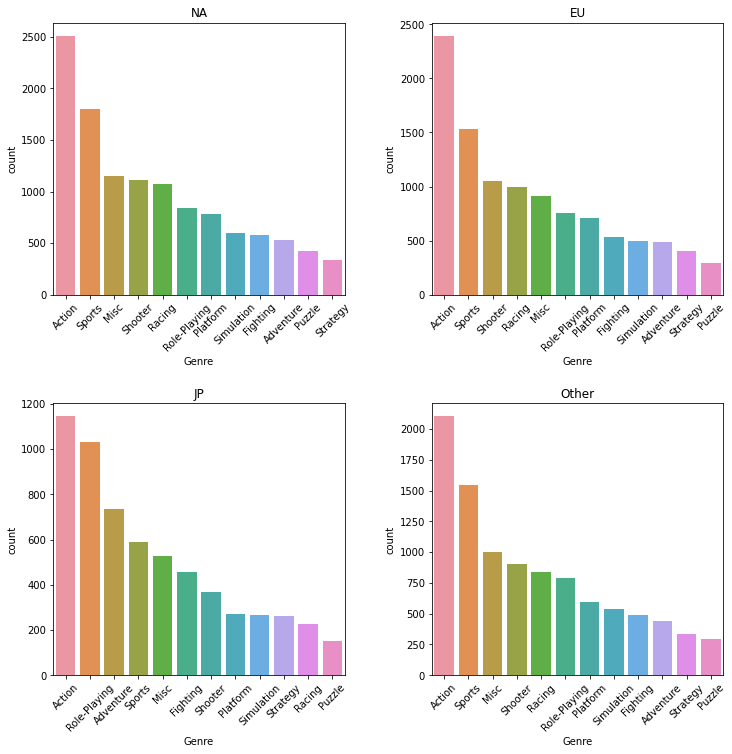

In [47]:
f, axes = plt.subplots(2,2)

# 격자 크기 설정
f.set_size_inches((12,12))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

sns.countplot(df_NA.Genre, ax=axes[0,0], order = df_NA.Genre.value_counts().index)
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)
axes[0,0].set_title("NA")
sns.countplot(df_EU.Genre, ax=axes[0,1], order = df_EU.Genre.value_counts().index)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
axes[0,1].set_title("EU")
sns.countplot(df_JP.Genre, ax=axes[1,0], order = df_JP.Genre.value_counts().index)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)
axes[1,0].set_title("JP")
sns.countplot(df_Other.Genre, ax=axes[1,1], order = df_Other.Genre.value_counts().index)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)
axes[1,1].set_title("Other")

In [48]:
# 지역별 장르별 출고량 비율
df_NA.Genre.value_counts() / len(df_NA)

Action          0.213392
Sports          0.153493
Misc            0.098273
Shooter         0.094444
Racing          0.091381
Role-Playing    0.071641
Platform        0.066621
Simulation      0.050966
Fighting        0.049604
Adventure       0.045520
Puzzle          0.036416
Strategy        0.028248
Name: Genre, dtype: float64

### 연도별 게임의 트렌드가 있을까 ?
트렌드는 장르를 기준으로 파악

In [49]:
# 연도(Year)를 10년단위로 나누어 Decade 변수 생성

df_c['Decade'] = '-'

for i in range(len(df_c)):
  if df_c.Year[i] < 1990:
    df_c.Decade[i] = "1980's"
  elif df_c.Year[i] < 2000:
    df_c.Decade[i] = "1990's"
  elif df_c.Year[i] < 2010:
    df_c.Decade[i] = "2000's"
  else:
    df_c.Decade[i] = "2010-2020's"

<ipython-input-49-0bd906c06931>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.Decade[i] = "2000's"
<ipython-input-49-0bd906c06931>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.Decade[i] = "2010-2020's"
<ipython-input-49-0bd906c06931>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.Decade[i] = "1990's"
<ipython-input-49-0bd906c06931>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [50]:
df_c['Decade'].value_counts()

2000's         9100
2010-2020's    5087
1990's         1751
1980's          203
Name: Decade, dtype: int64

In [51]:
pd.crosstab(df_c.Decade, df_c.Genre, margins=True)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Decade,,,,,,,,,,,,,
1980's,66,2,4,8,32,19,8,9,30,3,22,0,203
1990's,158,96,191,115,124,71,179,171,136,86,303,121,1751
2000's,1573,629,440,991,559,356,791,728,712,547,1397,377,9100
2010-2020's,1429,537,194,557,150,112,231,549,390,205,567,166,5087
All,3226,1264,829,1671,865,558,1209,1457,1268,841,2289,664,16141


In [52]:
crt = pd.crosstab(df_c.Decade, df_c.Genre, normalize = 'index')
crt

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Decade,,,,,,,,,,,,
1980's,0.325123,0.009852,0.019704,0.039409,0.157635,0.093596,0.039409,0.044335,0.147783,0.014778,0.108374,0.000000
1990's,0.090234,0.054826,0.109081,0.065677,0.070817,0.040548,0.102227,0.097658,0.077670,0.049115,0.173044,0.069103
2000's,0.172857,0.069121,0.048352,0.108901,0.061429,0.039121,0.086923,0.080000,0.078242,0.060110,0.153516,0.041429
2010-2020's,0.280912,0.105563,0.038136,0.109495,0.029487,0.022017,0.045410,0.107922,0.076666,0.040299,0.111461,0.032632


Text(0.5, 1.0, 'Genre - Decade Heatmap')

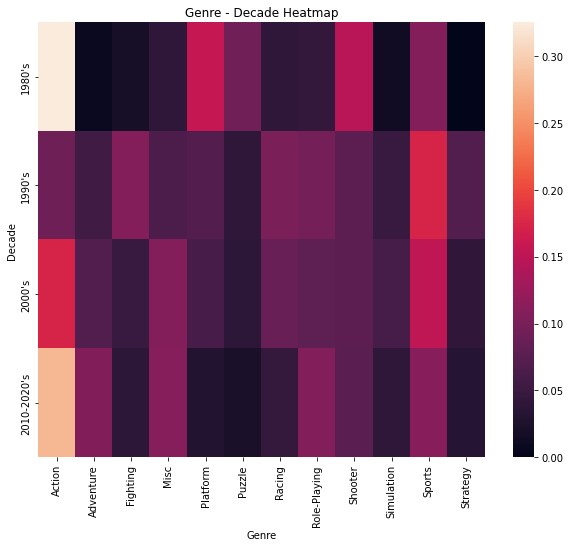

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(crt).set_title('Genre - Decade Heatmap')

In [54]:
stats.chi2_contingency(observed = crt)

(0.7599572590948029,
 1.0,
 33,
 array([[0.21728164, 0.05984053, 0.05381826, 0.08087038, 0.07984191,
         0.04882053, 0.06849228, 0.0824789 , 0.09509023, 0.04107545,
         0.13659886, 0.03579104],
        [0.21728164, 0.05984053, 0.05381826, 0.08087038, 0.07984191,
         0.04882053, 0.06849228, 0.0824789 , 0.09509023, 0.04107545,
         0.13659886, 0.03579104],
        [0.21728164, 0.05984053, 0.05381826, 0.08087038, 0.07984191,
         0.04882053, 0.06849228, 0.0824789 , 0.09509023, 0.04107545,
         0.13659886, 0.03579104],
        [0.21728164, 0.05984053, 0.05381826, 0.08087038, 0.07984191,
         0.04882053, 0.06849228, 0.0824789 , 0.09509023, 0.04107545,
         0.13659886, 0.03579104]]))

연도(Decade)와 장르(Genre) 간 관계가 있는지 확인하기 위해 카이제곱 검정을 시행한 결과,  
Chi-Square 값이 0.76(소수점 둘째자리까지 반올림), P-value가 1.0으로  
유의수준 0.05에서 귀무가설을 기각하지 못해  
연도(Decade)와 장르(Genre) 간에 통계적으로 유의한 관련성은 없는 것으로 나타났다.

### 인기가 많은 게임에 대한 분석 및 시각화 프로세스
총 출고량이 많을수록 인기가 많다고 정의

In [55]:
df_c.sort_values('Total_Sales', ascending = False).head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Decade
2838,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000's
4088,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980's
12237,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,2000's
3268,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000's
7626,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,1990's
1180,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1980's
6756,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2000's
2942,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,2000's
16076,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,2000's
10213,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1980's


총 출고량이 많은 상위 15개의 게임을 확인해 보았을 때,  
상위 15개의 게임들의 배급사가 모두 `Nintendo`인 것을 알 수 있다.  
또한, 특정 지역에만 출고되지 않고 전 지역에 출고된 것을 확인할 수 있다.  
`Wii Sports`는 2006년에 출시되었지만 총 출고량 약 82만건을 달성하였고  
`Super Mario Bros.`는 1985년에 출시되고 꾸준히 사랑받아 총 출고량 약 40만건을 달성하였다.


In [56]:
df_c.sort_values('Total_Sales', ascending = False)[7:15].Total_Sales

2942     29.01
16076    28.61
10213    28.31
10843    24.75
10370    23.43
9171     23.09
3347     22.72
10611    22.00
Name: Total_Sales, dtype: float64

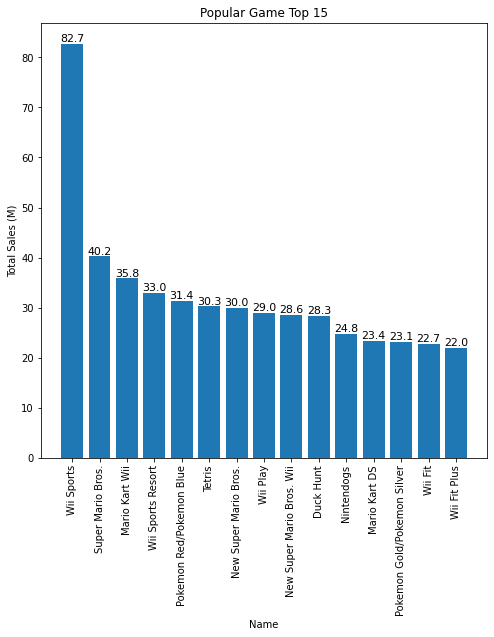

In [57]:
pop_15 = df_c.sort_values('Total_Sales', ascending = False)[:15]

plt.figure(figsize=(8, 8))
bar = plt.bar(pop_15.Name, pop_15.Total_Sales)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.xticks(rotation=90)
plt.title('Popular Game Top 15')
plt.xlabel('Name')
plt.ylabel('Total Sales (M)')

plt.show()

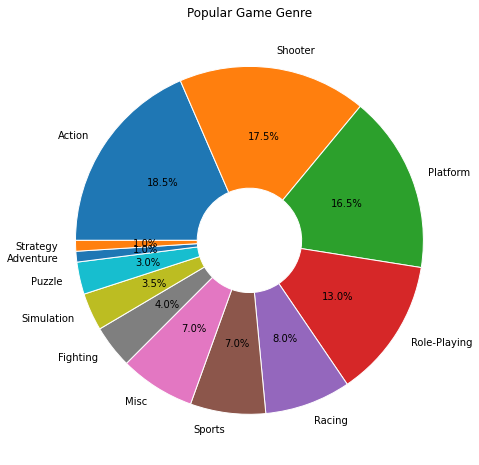

In [58]:
pop_200 = df_c.sort_values('Total_Sales', ascending = False)[:200]
cnt = pop_200.Genre.value_counts()
cnt = pd.DataFrame(cnt)

plt.figure(figsize=(8, 8))
wedgeprops={'width': 0.7, 'edgecolor': 'w'}
plt.pie(cnt.Genre, autopct='%.1f%%', labels = cnt.index, startangle=180, counterclock=False, wedgeprops=wedgeprops);
plt.title('Popular Game Genre');

### 다음 분기에 어떤 게임을 설계해야 하는지 !

2023 2분기에
1. Action 장르
2. 전 세계 지역을 타겟으로
3. Nintendo에 배급되도록
4. Wii 플랫폼에 지원되도록  

설계하면 게임이 흥행할 수 있는 조건을 모두 만족한다고 할 수 있다.